In [ ]:
# Démo BN

g1 = True
g2 = False
g3 = True
g4 = False

g1new = g1
g2new = g2
g3new = g3
g4new = g4

if (g1):
    g2new = True
    g1new = False
    
if (g1 and g2):
    g4new = False
    g1new = False
    g2new = False

if (g2):
    g3new = True
    g2new = False
    
if (g3):
    g4new = True
    g3new = False

if (g4):
    g1new = True
    g4new = False

g1 = g1new
g2 = g2new
g3 = g3new
g4 = g4new

print(g1, g2, g3, g4)

# Modèles booléens

Reprendre l'exemple de PBN donné en cours et le simuler dans les modes synchrone, puis asynchrone

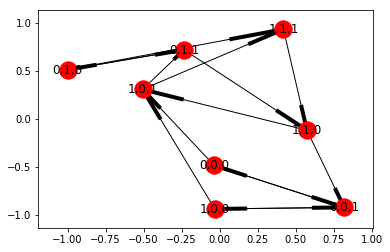

In [18]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def formate(b):
    if b:
        return "1"
    else:
        return "0"

def PBN(X):
    T = X.split(",")
    x1=T[0] == "1"
    x2=T[1] == "1"
    x3=T[2] == "1"
    nb=np.random.rand()
    if (nb<0.3):
        y1 = (x1 and x2) or (not(x2) and not(x3))
    else:
        y1 = (not(x1) and x2) or x3
    y2 = (x1 and x3) or (not(x1) and x2)
    y3 = (x1 and not(x2)) or not(x3)
    return formate(y1)+","+formate(y2)+","+formate(y3)

#X = "1,1,0"
#for i in range(20):
#    print(X)
#    X=PBN(X)

# Question : Construire le graphe de transition (utiliser networkx)
# On se base sur 10000 trajectoires de longueur 10
import networkx as nx

G = nx.DiGraph()

for n in range(10000):
    x1=np.random.rand()<0.5
    x2=np.random.rand()<0.5
    x3=np.random.rand()<0.5
    X = formate(x1)+","+formate(x2)+","+formate(x3)
    for k in range(100):
        Y=PBN(X)
        G.add_edge(X,Y)
        X=Y

nx.draw_networkx(G)



In [23]:
# Question : trouver les cycles
cycles = nx.algorithms.find_cycle(G)
for c in cycles:
    print(c)

('0,0,1', '1,0,0')
('1,0,0', '0,0,1')


# Réseaux bayésiens

Voir le tutoriel de pgmpy

pip install pgmpy

In [50]:
# Starting with defining the network structure
from pgmpy.models import BayesianModel

model = BayesianModel([ ('Nuages', 'Arrosage'), 
                        ('Nuages', 'Pluie'),
                        ('Arrosage', 'HerbeM'),
                        ('Pluie', 'HerbeM')])


In [51]:
from pgmpy.factors.discrete import TabularCPD

cpd_nuages = TabularCPD(variable='Nuages', variable_card=2,
                      values=[[0.3], [0.7]])
cpd_arrosage = TabularCPD(variable='Arrosage', variable_card=2,
                      values=[[0.5, 0.9], [0.5, 0.1]],
                      evidence=['Nuages'], evidence_card=[2])
cpd_pluie = TabularCPD(variable='Pluie', variable_card=2,
                      values=[[0.8, 0.2], [0.2, 0.8]],
                      evidence=['Nuages'], evidence_card=[2])
cpd_hm = TabularCPD(variable='HerbeM', variable_card=2,
                        values=[[1, 0.1, 0.1, 0.01],
                                [0, 0.9, 0.9, 0.99]],
                        evidence=['Arrosage', 'Pluie'],
                        evidence_card=[2, 2])
model.add_cpds(cpd_nuages,cpd_arrosage,cpd_pluie,cpd_hm)
model.check_model()

True

In [52]:
for cpd in model.get_cpds():
    print(cpd)

╒══════════╤═════╕
│ Nuages_0 │ 0.3 │
├──────────┼─────┤
│ Nuages_1 │ 0.7 │
╘══════════╧═════╛
╒════════════╤══════════╤══════════╕
│ Nuages     │ Nuages_0 │ Nuages_1 │
├────────────┼──────────┼──────────┤
│ Arrosage_0 │ 0.5      │ 0.9      │
├────────────┼──────────┼──────────┤
│ Arrosage_1 │ 0.5      │ 0.1      │
╘════════════╧══════════╧══════════╛
╒═════════╤══════════╤══════════╕
│ Nuages  │ Nuages_0 │ Nuages_1 │
├─────────┼──────────┼──────────┤
│ Pluie_0 │ 0.8      │ 0.2      │
├─────────┼──────────┼──────────┤
│ Pluie_1 │ 0.2      │ 0.8      │
╘═════════╧══════════╧══════════╛
╒══════════╤════════════╤════════════╤════════════╤════════════╕
│ Arrosage │ Arrosage_0 │ Arrosage_0 │ Arrosage_1 │ Arrosage_1 │
├──────────┼────────────┼────────────┼────────────┼────────────┤
│ Pluie    │ Pluie_0    │ Pluie_1    │ Pluie_0    │ Pluie_1    │
├──────────┼────────────┼────────────┼────────────┼────────────┤
│ HerbeM_0 │ 1.0        │ 0.1        │ 0.1        │ 0.01       │
├──────────┼──────

In [54]:
from pgmpy.inference import VariableElimination

inference = VariableElimination(model)

In [59]:
T1=0.99*(0.7*0.1*0.8+0.3*0.5*0.2)

In [60]:
T2=0.9*(0.7*0.9*0.8+0.3*0.5*0.2)

In [63]:
T3=0.9*(0.7*0.1*0.2+0.3*0.5*0.8)

In [64]:
T4=0*(0.7*0.9*0.2+0.3*0.5*0.8)

In [65]:
T1+T2+T3+T4

0.6863400000000001

In [66]:
query = inference.query(['HerbeM'])

In [67]:
print(query["HerbeM"])

╒══════════╤═══════════════╕
│ HerbeM   │   phi(HerbeM) │
╞══════════╪═══════════════╡
│ HerbeM_0 │        0.3137 │
├──────────┼───────────────┤
│ HerbeM_1 │        0.6863 │
╘══════════╧═══════════════╛


In [68]:
query = inference.query(['Nuages'],evidence={"HerbeM":1})
print(query['Nuages'])

╒══════════╤═══════════════╕
│ Nuages   │   phi(Nuages) │
╞══════════╪═══════════════╡
│ Nuages_0 │        0.2400 │
├──────────┼───────────────┤
│ Nuages_1 │        0.7600 │
╘══════════╧═══════════════╛
